### 1. Introduction to Support Vector Machines 
Table of Contents

Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

The original SVM algorithm was developed by Vladimir N Vapnik and Alexey Ya. Chervonenkis in 1963. At that time, the algorithm was in early stages. The only possibility is to draw hyperplanes for linear classifier. In 1992, Bernhard E. Boser, Isabelle M Guyon and Vladimir N Vapnik suggested a way to create non-linear classifiers by applying the kernel trick to maximum-margin hyperplanes. The current standard was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.

SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the kernel trick. It enable us to implicitly map the inputs into high dimensional feature spaces.

# 2. Support Vector Machines intuition 
Table of Contents

Now, we should be familiar with some SVM terminology.

* Hyperplane
A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the maximum margin hyperplane and the linear classifier it defines is known as the maximum margin classifier.

* Support Vectors
Support vectors are the sample data points, which are closest to the hyperplane. These data points will define the separating line or hyperplane better by calculating margins.

* Margin
A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.

The following diagram illustrates these concepts visually.

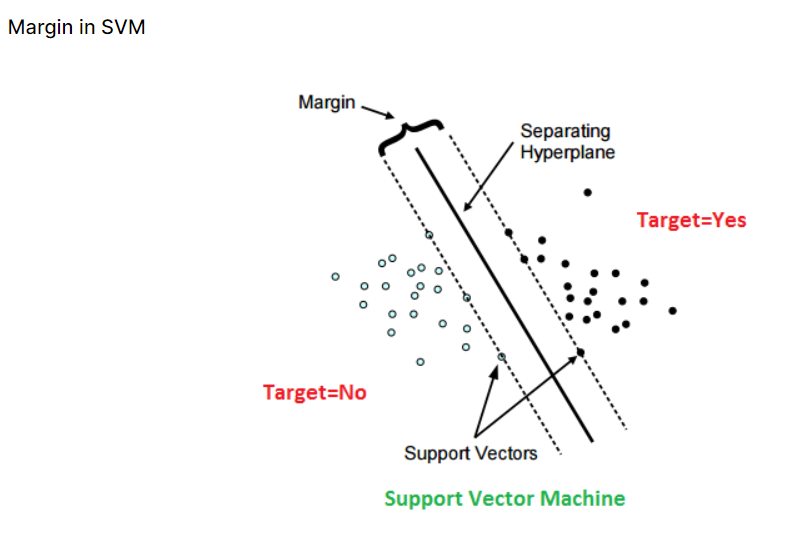

# SVM Under the hood
In SVMs, our main objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum margin hyperplane in the following 2 step process –

* Generate hyperplanes which segregates the classes in the best possible way. There are many hyperplanes that might classify the data. We should look for the best hyperplane that represents the largest separation, or margin, between the two classes.

* So, we choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the maximum margin hyperplane and the linear classifier it defines is known as a maximum margin classifier.

The following diagram illustrates the concept of maximum margin and maximum margin hyperplane in a clear manner.

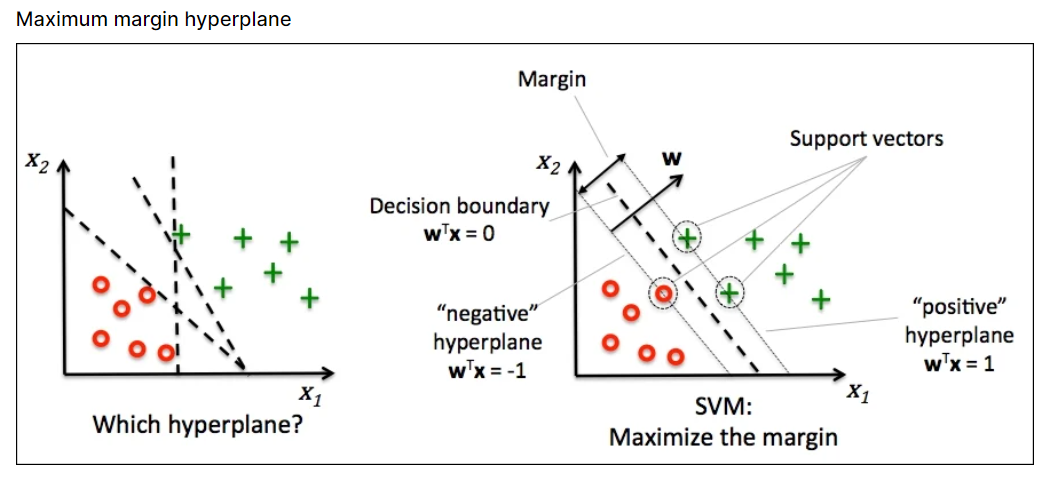

Problem with dispersed datasets

Sometimes, the sample data points are so dispersed that it is not possible to separate them using a linear hyperplane. In such a situation, SVMs uses a kernel trick to transform the input space to a higher dimensional space as shown in the diagram below. It uses a mapping function to transform the 2-D input space into the 3-D input space. Now, we can easily segregate the data points using linear separation.

Kernel trick - transformation of input space to higher dimensional space¶


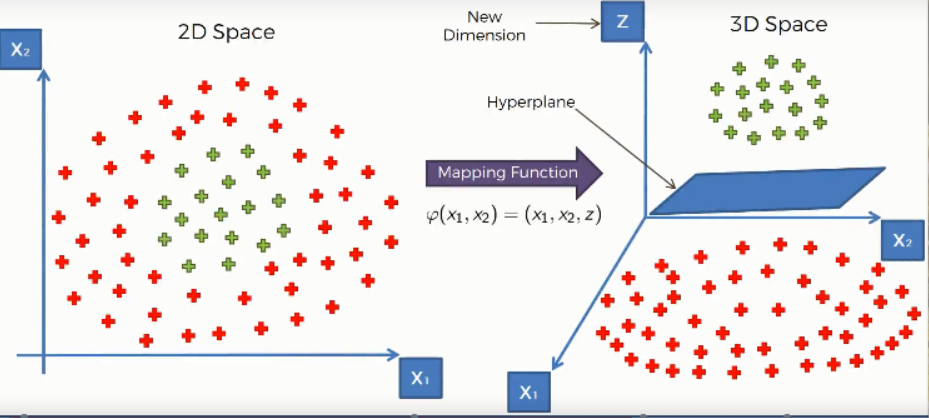

# 3. Kernel trick 
Table of Contents

In practice, SVM algorithm is implemented using a kernel. It uses a technique called the kernel trick. In simple words, a kernel is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.

We can define a kernel function as follows-3. Kernel trick 
Table of Contents

In practice, SVM algorithm is implemented using a kernel. It uses a technique called the kernel trick. In simple words, a kernel is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.

We can define a kernel function as follows-

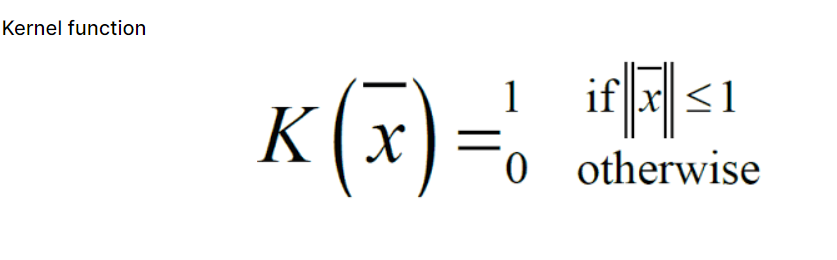

### 3.1 Linear kernel
In linear kernel, the kernel function takes the form of a linear function as follows-

linear kernel : K(xi , xj ) = xiT xj

Linear kernel is used when the data is linearly separable. It means that data can be separated using a single line. It is one of the most common kernels to be used. It is mostly used when there are large number of features in a dataset. Linear kernel is often used for text classification purposes.

Training with a linear kernel is usually faster, because we only need to optimize the C regularization parameter. When training with other kernels, we also need to optimize the γ parameter. So, performing a grid search will usually take more time.

Linear kernel can be visualized with the following figure.

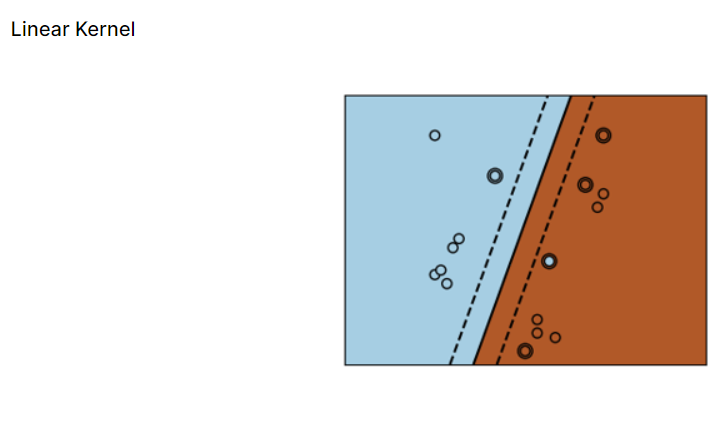

### 3.2 Polynomial Kernel
Polynomial kernel represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables. The polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of the input samples.

For degree-d polynomials, the polynomial kernel is defined as follows –

Polynomial kernel : K(xi , xj ) = (γxiT xj + r)d , γ > 0

Polynomial kernel is very popular in Natural Language Processing. The most common degree is d = 2 (quadratic), since larger degrees tend to overfit on NLP problems. It can be visualized with the following diagram.

Polynomial Kernel

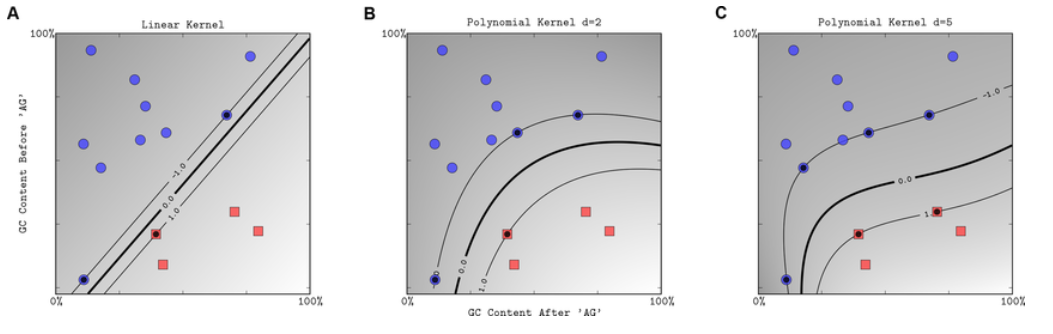

### 3.3 Radial Basis Function Kernel
Radial basis function kernel is a general purpose kernel. It is used when we have no prior knowledge about the data. The RBF kernel on two samples x and y is defined by the following equation –

Radial Basis Function kernel

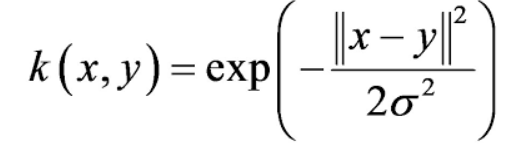

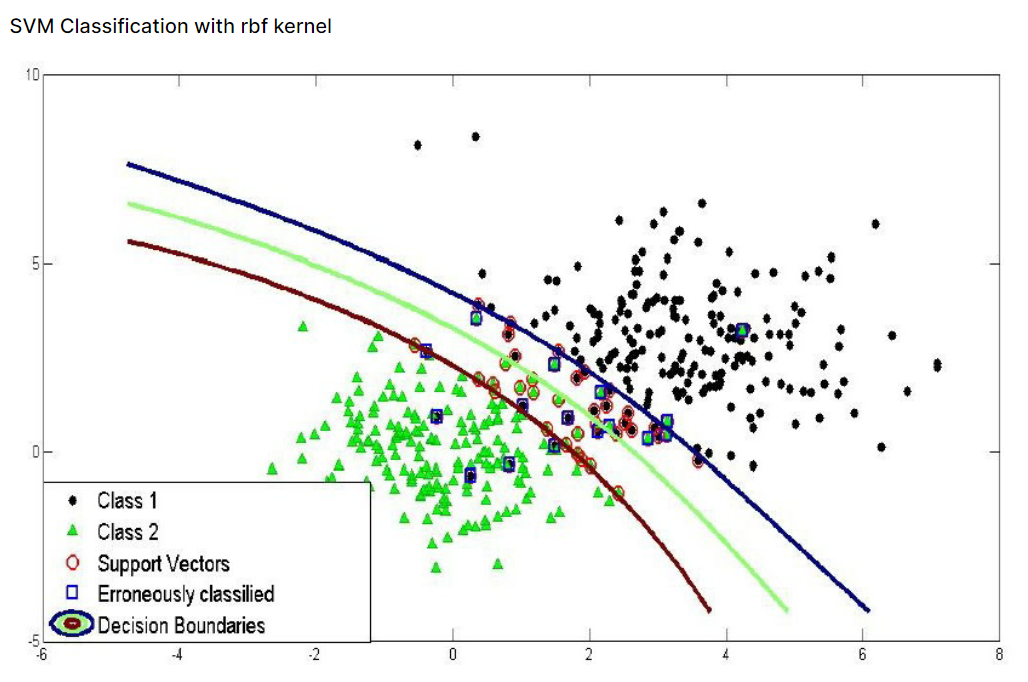

## 3.4 Sigmoid kernel
Sigmoid kernel has its origin in neural networks. We can use it as the proxy for neural networks. Sigmoid kernel is given by the following equation –

sigmoid kernel : k (x, y) = tanh(αxTy + c)

Sigmoid kernel can be visualized with the following diagram-

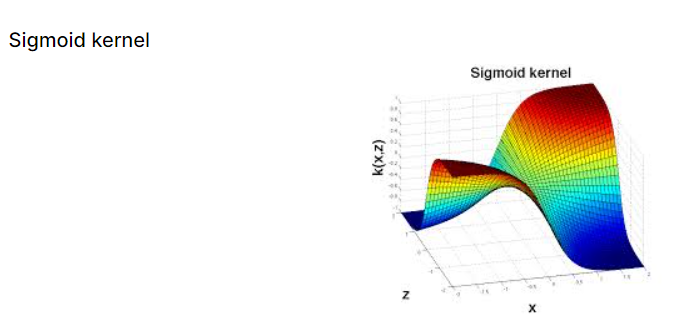

### 4. SVM Scikit-Learn libraries 
Table of Contents

Scikit-Learn provides useful libraries to implement Support Vector Machine algorithm on a dataset. There are many libraries that can help us to implement SVM smoothly. We just need to call the library with parameters that suit to our needs. In this project, I am dealing with a classification task. So, I will mention the Scikit-Learn libraries for SVM classification purposes.

First, there is a LinearSVC() classifier. As the name suggests, this classifier uses only linear kernel. In LinearSVC() classifier, we don’t pass the value of kernel since it is used only for linear classification purposes.

Scikit-Learn provides two other classifiers - SVC() and NuSVC() which are used for classification purposes. These classifiers are mostly similar with some difference in parameters. NuSVC() is similar to SVC() but uses a parameter to control the number of support vectors. We pass the values of kernel, gamma and C along with other parameters. By default kernel parameter uses rbf as its value but we can pass values like poly, linear, sigmoid or callable function.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## 1. Import libaries:

In [2]:
import pandas as pd
import seaborn as sns 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from seaborn import load_dataset, pairplot
from sklearn import preprocessing 
import matplotlib.pyplot as plt

### 2. Import Data:

In [13]:
df= load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [14]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [24]:
filler = df["bill_length_mm"].mean()
df["bill_length_mm"] = df["bill_length_mm"].fillna(filler)
#a = pd.DataFrame([1,2,3,4])
type(a)
# np.median()
df["bill_length_mm"].isnull().sum()

0

## 3. Understanding Data:

In [4]:
# information of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
#describe data: 
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
# Null data:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
# Drop null data:
df=df.dropna()
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
# check the balance of the target:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

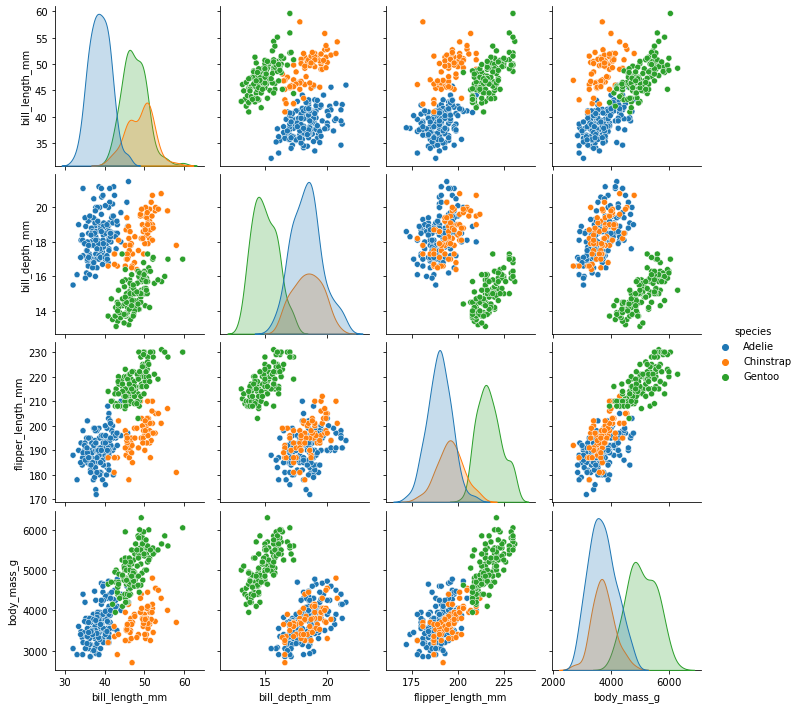

In [8]:
pairplot(df, hue='species')
plt.show()

### 4. Label Encoding:

In [10]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()

df_encode= df.copy()
df_encode['island']= LE.fit_transform(df_encode['island'])
df_encode['sex']= LE.fit_transform(df_encode['sex'])

df_encode.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1


## 5. Feature selection:
Feature selection is a process of selecting the most significant and relevant features from a vast set of features in the given dataset.

So feature selection helps in finding the smallest set of features which results in

* Training a machine learning algorithm faster.

* Reducing the complexity of a model and making it easier to interpret.

* Building a sensible model with better prediction power.

* Reducing over-fitting by selecting the right set of features.

There are three types of feature selection techniques :

* Filter methods

* Wrapper methods

* Embedded methods

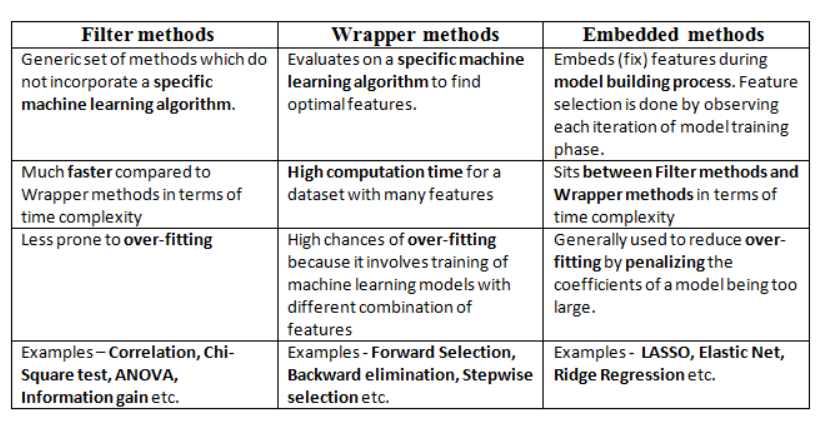

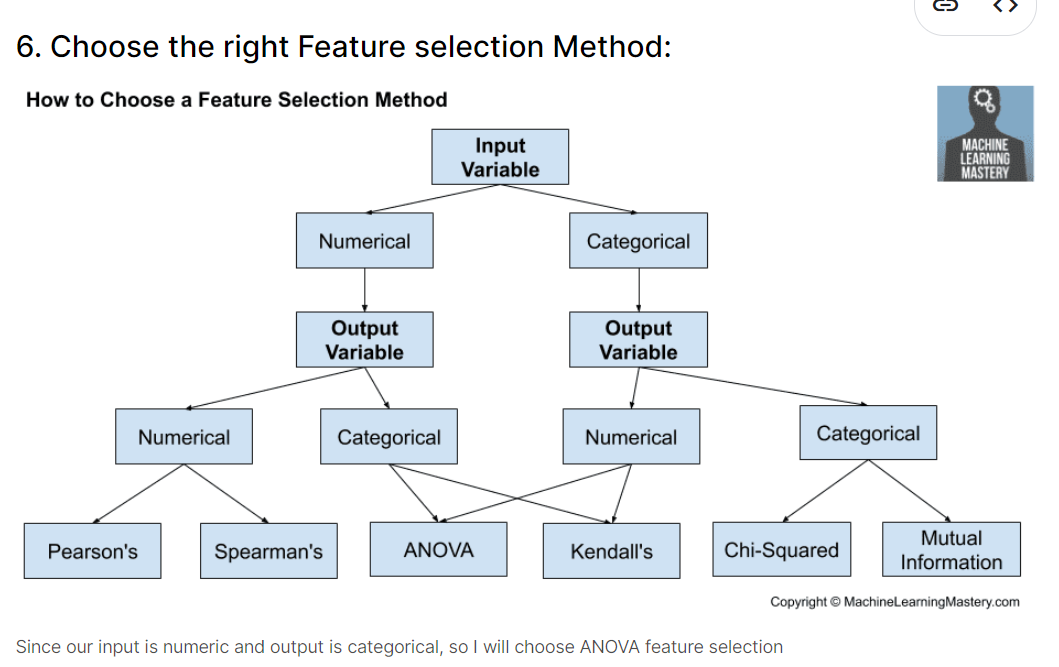

In [11]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif # Chi-Squared test belongs the class of filter methods

In [12]:
X=df_encode.drop(['species'], axis=1)
Y=df_encode['species']

# Feature extraction
test = SelectKBest(score_func=f_classif, k='all')
fit = test.fit(X, Y)

#Feature Selection result:
fsr= pd.DataFrame({'feature': X.columns,
                    'score':fit.scores_,})
fsr

,feature,score
0,island,142.709682
1,bill_length_mm,397.299437
2,bill_depth_mm,344.825082
3,flipper_length_mm,567.406992
4,body_mass_g,341.894895
5,sex,0.024088


In [60]:
pd.DataFrame({'score':fit.scores_,
              'feature': X.columns})

,score,feature
0,142.709682,island
1,397.299437,bill_length_mm
2,344.825082,bill_depth_mm
3,567.406992,flipper_length_mm
4,341.894895,body_mass_g
5,0.024088,sex


<AxesSubplot:xlabel='score', ylabel='feature'>

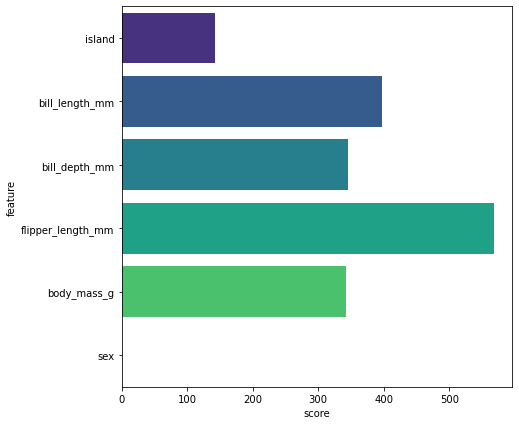

In [61]:
#Visualize the feature scores
fig, ax=plt.subplots(figsize=(7,7))
plot=sns.barplot(data=fsr, x='score', y='feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')
plot  

In [62]:
# The least important features as shown on the bar plot above is Sex. I will drop it!

In [63]:
# drop sex column:
new_df= df_encode.drop(columns='sex')
new_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,2,39.1,18.7,181.0,3750.0
1,Adelie,2,39.5,17.4,186.0,3800.0
2,Adelie,2,40.3,18.0,195.0,3250.0
4,Adelie,2,36.7,19.3,193.0,3450.0
5,Adelie,2,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
338,Gentoo,0,47.2,13.7,214.0,4925.0
340,Gentoo,0,46.8,14.3,215.0,4850.0
341,Gentoo,0,50.4,15.7,222.0,5750.0
342,Gentoo,0,45.2,14.8,212.0,5200.0


### 7. One-Hot Encoding: using get_dummies

In [64]:
df['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [65]:
oec = pd.get_dummies(new_df['island'])
final_df= new_df.join(oec)
final_df.drop(columns='island',inplace=True)
final_df=final_df.rename(columns={0:'Biscoe', 1:'Dream',2:'Torgersen'})
final_df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,0,0,1
...,...,...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,1,0,0
340,Gentoo,46.8,14.3,215.0,4850.0,1,0,0
341,Gentoo,50.4,15.7,222.0,5750.0,1,0,0
342,Gentoo,45.2,14.8,212.0,5200.0,1,0,0


### 8. Spliting features and target for modeling:

In [66]:
X=final_df.iloc[:, 1:8]#feature
y= final_df['species'] #target

### 9. Standardize the data:

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=X.columns)
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen
0,0.254545,0.666667,0.152542,0.291667,0.0,0.0,1.0
1,0.269091,0.511905,0.237288,0.305556,0.0,0.0,1.0
2,0.298182,0.583333,0.389831,0.152778,0.0,0.0,1.0
3,0.167273,0.738095,0.355932,0.208333,0.0,0.0,1.0
4,0.261818,0.892857,0.305085,0.263889,0.0,0.0,1.0
...,...,...,...,...,...,...,...
328,0.549091,0.071429,0.711864,0.618056,1.0,0.0,0.0
329,0.534545,0.142857,0.728814,0.597222,1.0,0.0,0.0
330,0.665455,0.309524,0.847458,0.847222,1.0,0.0,0.0
331,0.476364,0.202381,0.677966,0.694444,1.0,0.0,0.0


### 10. Train -Test Split Data:

In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, train_size= 0.8, random_state= 4)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(266, 7) (67, 7)
(266,) (67,)


### 11. Hyperparameter Tuning:

In [69]:
from sklearn.svm import SVC #Classifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Accuracy metrics

In [70]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 
               'kernel': ['sigmoid','rbf','poly'], 
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
accuracy = grid_search.best_score_
print('accuracy is', accuracy)
print('parameters:',grid_search.best_params_)

accuracy is 0.9962962962962962
parameters: {'C': 1000, 'gamma': 0.3, 'kernel': 'sigmoid'}


### 12. Predict and Evaluating SVM model:

In [71]:
# Building and fit the classifier
classifier = SVC(C= 1000, 
                 gamma= 0.3, 
                 kernel= 'sigmoid')
classifier.fit(X_train, y_train)


# prediction
y_predict = classifier.predict(X_test)
print('accracy score is', accuracy_score(y_test, y_predict))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print('------------------------------------------------')
print('cofusion metric:')
print(cm)
print('------------------------------------------------')
print('classification report')
print(classification_report(y_test, y_predict))

accracy score is 1.0
------------------------------------------------
cofusion metric:
[[34  0  0]
 [ 0 14  0]
 [ 0  0 19]]
------------------------------------------------
classification report
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        34
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        19

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [72]:
# Building and fit the classifier
clf = SVC(kernel='rbf', gamma=0.01, C=1000)
clf.fit(X_train, y_train)

# prediction
y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

1.0


array([[34,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 19]], dtype=int64)

In [73]:
# Our model accquires 100% accuracy!!! 

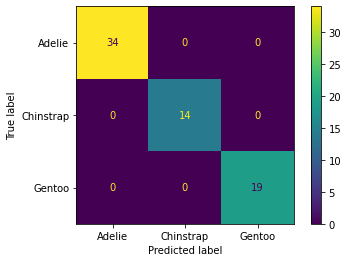

In [74]:
# plot Confusion Matrix:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test) 

### Refrences
* https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection#6.-Tips-and-Tricks-for-Feature-Selection-
* https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb

### For SVM Kernel
* https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/
* https://www.analytixlabs.co.in/blog/introduction-support-vector-machine-algorithm/